# Of all renewable energy types creating electricity, which have seen the most growth over five years?
### Data source: data.UN.org Energy Statistics Database

## i.Data Cleansing

### i.a. Combining & Merging

#### I used the 'unique' function to find out which variables in this dataset are useful, and found "Final consumption" to be a good place to start for each energy type.

#### All of the energy types are in separate csv files but have the same column headers, so they are easy to merge using the map function.

In [41]:
#combining all datasets in the nonrenewables file using map function

import glob
import pandas as pd 

df = pd.concat(map(pd.read_csv, glob.glob('C:/Users/Rachel/OneDrive/Documents/Springboard/CAPSTONE 2/energy/raw_data_renewable/*.csv')))
df.rename(columns={'Country or Area':'Geo'}, inplace=True)

#split commodity and transaction into two columns
#defining column to split and which delimiter
ct = df['Commodity - Transaction'].str.split('-')

#assigning new columns
df['Commodity'] = ct.str.get(0)
df['Transaction'] = ct.str.get(1)

#lowercase and remove trailing and leading spaces
df['Commodity'] = df['Commodity'].str.lower()
df['Commodity'] = df['Commodity'].str.strip()

df['Transaction'] = df['Transaction'].str.lower()
df['Transaction'] = df['Transaction'].str.strip()

elec = df[df['Commodity'] == 'electricity']

elec_ct = elec['Transaction'].str.split(' ')
elec['Commodity'] = elec_ct.str.get(1)

elec.sample(100)



,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
3636,Sao Tome and Principe,Electricity - total hydro production,2008.0,"Kilowatt-hours, million",8.00,1.0,hydro,total hydro production
487,El Salvador,Electricity - total solar production,2018.0,"Kilowatt-hours, million",289.30,NaN,solar,total solar production
1184,El Salvador,Electricity - total hydro production,2007.0,"Kilowatt-hours, million",1739.00,NaN,hydro,total hydro production
308,Colombia,Electricity - total wind production,2012.0,"Kilowatt-hours, million",55.00,NaN,wind,total wind production
4253,Ukraine,Electricity - total hydro production,1996.0,"Kilowatt-hours, million",8833.00,NaN,hydro,total hydro production
...,...,...,...,...,...,...,...,...
362,Mexico,Electricity - total geothermal production,1995.0,"Kilowatt-hours, million",5669.00,NaN,geothermal,total geothermal production
837,Congo,Electricity - total hydro production,2003.0,"Kilowatt-hours, million",342.00,NaN,hydro,total hydro production
191,Brazil,Electricity - total wind production,2012.0,"Kilowatt-hours, million",5050.00,NaN,wind,total wind production
1276,New Caledonia,Electricity - total solar production,2013.0,"Kilowatt-hours, million",4.67,NaN,solar,total solar production


In [42]:
elec.Transaction.unique()

array(['total geothermal production', 'total hydro production',
       'total solar production', 'total tide, wave production',
       'total wind production'], dtype=object)

## ii.Renewables Metrics
#### iii.a. Overall change from 2013 to 2018

In [43]:
#creating multiple filters to get total energy supply of all types from 2018
elec_2018 = elec[elec['Year'] == 2018]


comm_grp = elec_2018.groupby(['Commodity'])
comm_grp.get_group('wind')

,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
0,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",84.000,1.0,wind,total wind production
5,Argentina,Electricity - total wind production,2018.0,"Kilowatt-hours, million",1413.000,NaN,wind,total wind production
28,Armenia,Electricity - total wind production,2018.0,"Kilowatt-hours, million",1.881,NaN,wind,total wind production
40,Aruba,Electricity - total wind production,2018.0,"Kilowatt-hours, million",174.900,1.0,wind,total wind production
49,Australia,Electricity - total wind production,2018.0,"Kilowatt-hours, million",15164.000,NaN,wind,total wind production
...,...,...,...,...,...,...,...,...
1881,United States,Electricity - total wind production,2018.0,"Kilowatt-hours, million",275834.000,NaN,wind,total wind production
1911,Uruguay,Electricity - total wind production,2018.0,"Kilowatt-hours, million",4732.200,NaN,wind,total wind production
1924,Vanuatu,Electricity - total wind production,2018.0,"Kilowatt-hours, million",4.770,NaN,wind,total wind production
1935,Venezuela (Bolivar. Rep.),Electricity - total wind production,2018.0,"Kilowatt-hours, million",71.000,NaN,wind,total wind production


## iv.Renewables Metrics 2018

In [44]:
sum_2018_elec = comm_grp['Quantity'].agg(['sum'])
sum_2018_elec.rename(columns={'sum' : 'Qty 2018'}, inplace=True)
sum_2018_elec.head()

,Qty 2018
Commodity,
geothermal,8.793326e+04
hydro,4.305553e+06
solar,5.650673e+05
"tide,",9.941000e+02
wind,1.272283e+06


In [45]:
#creating multiple filters to get total energy supply of all types from 2013
elec_2013 = elec[elec['Year'] == 2013]


comm_grp_13 = elec_2013.groupby(['Commodity'])
comm_grp_13.get_group('wind')


,Geo,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes,Commodity,Transaction
10,Argentina,Electricity - total wind production,2013.0,"Kilowatt-hours, million",461.000,NaN,wind,total wind production
33,Armenia,Electricity - total wind production,2013.0,"Kilowatt-hours, million",4.000,NaN,wind,total wind production
45,Aruba,Electricity - total wind production,2013.0,"Kilowatt-hours, million",138.400,1.0,wind,total wind production
54,Australia,Electricity - total wind production,2013.0,"Kilowatt-hours, million",7960.000,NaN,wind,total wind production
79,Austria,Electricity - total wind production,2013.0,"Kilowatt-hours, million",3152.000,NaN,wind,total wind production
...,...,...,...,...,...,...,...,...
1886,United States,Electricity - total wind production,2013.0,"Kilowatt-hours, million",169713.000,NaN,wind,total wind production
1916,Uruguay,Electricity - total wind production,2013.0,"Kilowatt-hours, million",142.900,NaN,wind,total wind production
1929,Vanuatu,Electricity - total wind production,2013.0,"Kilowatt-hours, million",5.549,NaN,wind,total wind production
1940,Venezuela (Bolivar. Rep.),Electricity - total wind production,2013.0,"Kilowatt-hours, million",159.270,NaN,wind,total wind production


In [46]:
sum_2013_elec = comm_grp_13['Quantity'].agg(['sum'])
sum_2013_elec.rename(columns={'sum' : 'Qty 2013'}, inplace=True)
sum_2013_elec.head()

,Qty 2013
Commodity,
geothermal,7.596189e+04
hydro,3.886625e+06
solar,1.351768e+05
"tide,",9.180000e+02
wind,6.478235e+05


In [47]:
#combine data frames for each year to get percentage change
renew_pc = pd.concat([sum_2013_elec, sum_2018_elec], axis='columns', sort=False)

In [52]:
renew_pc['change'] = renew_pc['Qty 2018'] - renew_pc['Qty 2013']
renew_pc['perc_change'] = (renew_pc['change'] / renew_pc['Qty 2013']) * 100
renew_pc.sort_values(by='perc_change', ascending=False)

,Qty 2013,Qty 2018,change,perc_change
Commodity,,,,
solar,1.351768e+05,5.650673e+05,429890.508400,318.020831
wind,6.478235e+05,1.272283e+06,624459.156570,96.393409
geothermal,7.596189e+04,8.793326e+04,11971.378722,15.759718
hydro,3.886625e+06,4.305553e+06,418927.231766,10.778688
"tide,",9.180000e+02,9.941000e+02,76.100000,8.289760


AxesSubplot(0.125,0.125;0.775x0.755)


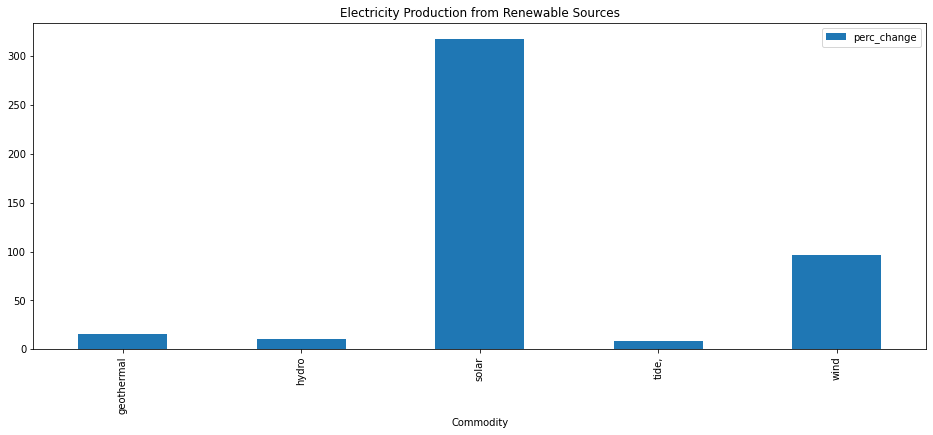

In [67]:
import matplotlib.pyplot as plt 

pc_only = renew_pc.drop(['Qty 2013', 'Qty 2018', 'change'],axis=1)


print(pc_only.plot(kind='bar', figsize=(16,6), title='Electricity Production from Renewable Sources, Percent Change from 2013 to 2018'))

AxesSubplot(0.125,0.125;0.775x0.755)


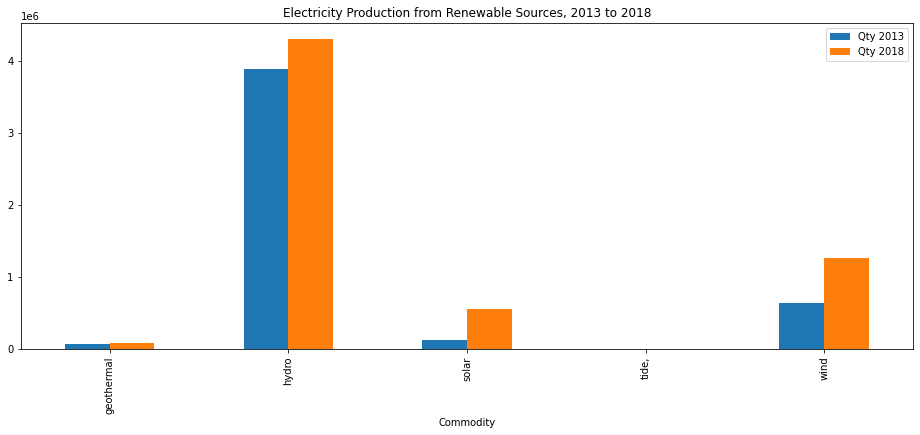

In [69]:
import matplotlib.pyplot as plt 
no_pc = renew_pc.drop(['change', 'perc_change'], axis=1)

print(no_pc.plot(kind='bar', figsize=(16,6), title='Electricity Production from Renewable Sources, 2013 to 2018'))

## v.Insights

It looks like solar had an increase of over 300% over 5 years from 2013 to 2018, while wind had an increase of 100%.  Geothermal electricity had an increase of 15%, however from the other analysis it looks like direct use of geothermal heat increased 55%.  Hydro and tide did not increase much, likely due to difficulty in their installation.